Chapter 12

# 利用statsmodels.multivariate.pca完成主成分分析
《线性代数》 | 鸢尾花书：数学不难

这段代码以主成分分析（PCA）为核心，完整实现了对高维数据的降维、可视化、解释方差计算和低维近似还原等步骤，具有严密的数学逻辑。下面我们按步骤详细分析其数学意义，并穿插相应公式。

---

首先，导入所需的库，其中 `statsmodels.multivariate.pca` 模块用于执行PCA分析。然后读取数据集 $X$，我们记作：

$X \in \mathbb{R}^{n \times d}$，其中 $n$ 表示样本个数，$d$ 表示原始特征维度。

---

接着计算的是数据的**线性相关性系数矩阵**，即：

$P = \text{corr}(X)$

该矩阵 $P \in \mathbb{R}^{d \times d}$ 中的第 $(i,j)$ 元素是第 $i$ 和第 $j$ 个特征的皮尔逊相关系数，度量的是它们之间的线性关系，范围在 $[-1, 1]$ 之间。

---

随后进入主成分分析部分：

```python
pca_model = pca.PCA(X_df, standardize=True)
```

执行了以下数学操作：

- 首先对数据 $X$ 做标准化，即对每一列特征 $x_j$ 减去其均值 $\mu_j$ 并除以标准差 $\sigma_j$：

$$
\tilde{X}_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$

- 然后计算标准化数据 $\tilde{X}$ 的协方差矩阵：

$$
\Sigma = \frac{1}{n-1} \tilde{X}^T \tilde{X}
$$

- 对协方差矩阵进行**特征值分解（谱分解）**：

$$
\Sigma = V \Lambda V^T
$$

其中 $\Lambda$ 是一个对角矩阵，包含从大到小排列的特征值 $\lambda_1, \lambda_2, ..., \lambda_d$，$V$ 是其对应的特征向量矩阵，每一列是一个主成分方向。

---

代码中：

```python
variance_V = pca_model.eigenvals
```

表示 $\Lambda$ 中的各个 $\lambda_k$，即每个主成分对应的方差。

解释方差占比为：

$$
\text{explained\_var\_ratio}_k = \frac{\lambda_k}{\sum_{j=1}^{d} \lambda_j}
$$

该比值反映了第 $k$ 个主成分对整体数据方差的解释能力。

---

陡坡图（Scree Plot）通过蓝线显示每个主成分的方差（即特征值），通过红线显示累计解释方差百分比：

$$
\text{Cumulative}_k = \sum_{j=1}^{k} \text{explained\_var\_ratio}_j \times 100\%
$$

这个图用于判断选取前几个主成分作为主要表示空间是否足够。

---

```python
loadings = pca_model.loadings[['comp_0','comp_1']]
```

这一行输出了前两个主成分的**载荷矩阵（Loadings）**：

$$
L = V[:,0:2]
$$

载荷矩阵表示原始变量在新坐标系（主成分轴）上的投影系数，即主成分是如何由原始变量线性组合而成的。

---

最后，用前两个主成分还原数据：

```python
X_df_ = pca_model.project(2)
```

这是在执行降维投影：

$$
Z = \tilde{X} V_{[:,1:2]} \in \mathbb{R}^{n \times 2}
$$

其中 $Z$ 是降到二维后的新表示。在教学和可视化中，这种还原是非常常见的做法，用来查看是否低维空间可以“近似重构”原始数据的结构。

## 初始化

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.multivariate.pca as pca

## 加载数据

In [5]:
X_df = pd.read_pickle('X_df.pkl')

## 相关性系数矩阵

In [7]:
P = X_df.corr()

## 主成分分析

In [9]:
pca_model = pca.PCA(X_df, standardize=True)

In [10]:
variance_V = pca_model.eigenvals 
# 计算主成分的方差解释比例

In [11]:
explained_var_ratio = variance_V / variance_V.sum()

In [12]:
PC_range = np.arange(len(variance_V)) + 1

In [13]:
labels = ['$PC_' + str(index) + '$' for index in PC_range]

(0.9, 8.1)

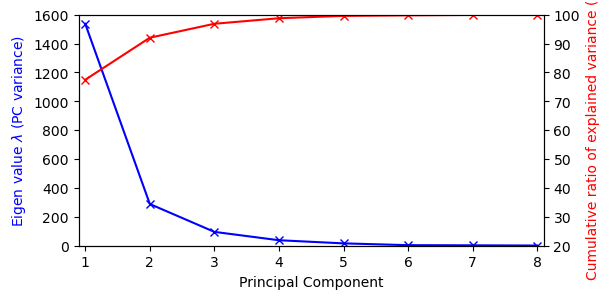

In [36]:
# 陡坡图
fig, ax1 = plt.subplots(figsize = (6,3))

ax1.plot(PC_range, variance_V, 'b', marker = 'x')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel(r'Eigen value $\lambda$ (PC variance)', color='b')
ax1.set_ylim(0,1600); ax1.set_xticks(PC_range)

ax2 = ax1.twinx()
ax2.plot(PC_range, np.cumsum(explained_var_ratio)*100, 
         'r', marker = 'x')
ax2.set_ylabel(r'Cumulative ratio of explained variance (%)',
               color='r')
ax2.set_ylim(20,100)
ax2.set_xlim(PC_range.min() - 0.1,PC_range.max() + 0.1)

## PCA载荷

In [ ]:
loadings= pca_model.loadings[['comp_0','comp_1']]

In [16]:
loadings

,comp_0,comp_1,comp_2
0.5 yr,0.256636,-0.570500,-0.715678
1 yr,0.317182,-0.488501,0.197301
2 yr,0.358665,-0.294732,0.403551
5 yr,0.389874,0.018947,0.280251
7 yr,0.391000,0.125592,0.160478
10 yr,0.387324,0.215072,0.039425
20 yr,0.359370,0.363357,-0.270587
30 yr,0.347625,0.393208,-0.327046


## 用前2主成分获得还原数据

In [18]:
X_df_ = pca_model.project(2)

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  